In [581]:
import numpy as np
import matplotlib.pyplot as plt

En esta sección solo correr una de las funciones con sus respectivos parámetros, haciendo un cambio a Code (tecla Y) cuando se use, y a Markdown (tecla M) cuando no:

1. Esfera

2. Rosenbrok

3. Himmelblau's

4. Eggholder

# Esfera 
def funcion(x):
    return np.sum(x**2)

m = 15               # longitud del genotipo
pob_size = 50        # tamaño de la población 
a = -10              # valor mínimo de x
b = 10               # valor máximo de x
decimales=3          # número de decimales
n = 2                # variables a considerar
t = m * n            # total de bits 
epsilon = 1e-6       # cota de selección
proba_cruza = 0.8    # probabilidad de cruza
proba_muta = 1/t     # probabilidad de mutación
generaciones = 100   # número de generaciones
etapas = 5           # número de etapas  
umbral = 1e-8        # umbral de paro
max_sin_mejora = 50  # max de generaciones sin mejora

# Rosenbrok
def funcion(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

m = 15             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales = 3      # número de decimales
n = 5              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100 # número de generaciones
etapas = 5         # número de etapas  
umbral = 1e-8        # umbral de paro
max_sin_mejora = 50  # max de generaciones sin mejora

# Himmelblau's
def funcion(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

m = 14             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -5            # valor mínimo de x
b = 5             # valor máximo de x
decimales = 3      # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5         # número de etapas  
umbral = 1e-8        # umbral de paro
max_sin_mejora = 50  # max de generaciones sin mejora


In [583]:
# Eggholder
def funcion(x,y):
    term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
    term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
    return -(y + 47) * term1 - x * term2

m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t   # probabilidad de mutación
generaciones = 100  # número de generaciones
etapas = 5        # número de etapas  
umbral = -960       # umbral de paro
max_sin_mejora = 50  # max de generaciones sin mejora

In [584]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [585]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [586]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


En ésta parte también se diferencia la evaluación de la función.

# Esfera y Rosenbrock
def eva_funcion(ind, a, b, m, decimales):
    x= deco_ind(ind, a, b, m, decimales)
    return funcion(x)

In [587]:
# Himmelblau's y Eggholder
def eva_funcion(ind, a, b, m, decimales):
    x,y= deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [588]:
def torneo(pob, m, a, b, decimales, epsilon):
    idx1 = np.random.randint(0, len(pob))
    idx2 = np.random.randint(0, len(pob))

    f1 = eva_funcion(pob[idx1],m, a, b, decimales)
    f2 = eva_funcion(pob[idx2],m, a, b, decimales)

    if f1 < f2:
        return pob[idx1], idx1
    else:
        return pob[idx2], idx2

In [589]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [590]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

In [591]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
                     etapas, generaciones, umbral, max_sin_mejora):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    total_generacion = 0
    h = []      # Historial de la mejor evaluación en cada generación
    h_pp = []  # Historial del promedio de evaluaciones en cada generación
    
    elite = int(np.ceil(0.2 * pob_size))
    
    for eta in range(etapas):
        print(f"\n=== Etapa {eta+1} ===")
        eta_h = []
        eta_h_pp = []
        for gen in range(generaciones):
            total_generacion += 1
            evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
            mejor_ahora = min(evaluar)
            current_avg = np.mean(evaluar)
            eta_h.append(mejor_ahora)
            eta_h_pp.append(current_avg)
            h.append(mejor_ahora)
            h_pp.append(current_avg)

             # Verificar si hay mejora
            if mejor_ahora < mejor_aptitud:
                mejor_aptitud = mejor_ahora
                mejor_hijo = pob[np.argmin(evaluar)]
                sin_mejora = 0  # Reinicia el contador
            else:
                sin_mejora += 1  # Aumenta si no hubo mejora

            # Criterios de paro
            if mejor_aptitud < umbral:
                print("\n🛑 Criterio de paro: Se alcanzó el umbral de aptitud.")
                return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp
            
            if sin_mejora >= max_sin_mejora:
                print("\n🛑 Criterio de paro: No hubo mejora en las últimas", max_sin_mejora, "generaciones.")
                return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp


            if total_generacion % 10 == 0:
                print(f"Generación {total_generacion} - Mejor: {round(mejor_ahora, decimales)} | Promedio: {round(current_avg, decimales)}")
            
            # elitismo
            sorted_indices = np.argsort(evaluar)
            elite_idx = [pob[i] for i in sorted_indices[:elite]]
            
            new_pob_elite = []
            while len(new_pob_elite) < (pob_size - elite):
                padre1, _ = torneo(pob, m, a, b, decimales, epsilon)
                padre2, _ = torneo(pob, m, a, b, decimales, epsilon)
                
                hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
                hijo1 = mutar(hijo1, proba_muta)
                hijo2 = mutar(hijo2, proba_muta)
                
                new_pob_elite.append(hijo1)
                if len(new_pob_elite) < (pob_size - elite):
                    new_pob_elite.append(hijo2)
            
            pob = np.array(new_pob_elite + elite_idx)
        print(f"Fin de la Etapa {eta+1}: Mejor en etapa: {round(min(eta_h), decimales)} | Promedio etapa: {round(np.mean(eta_h_pp), decimales)}")

    print("\n🛑 Criterio de paro: Se alcanzó el máximo de generaciones.")
    return mejor_hijo, mejor_aptitud, total_generacion, h, h_pp

# Función para guardar los resultados
def guardar_r(r, convex, top):
    with open("Eggholder (codificación binaria) resultados.txt", "w") as f:
        f.write(" === RESUMEN FINAL === \n")
        for res in r:
            f.write(f"\n Iteracion {res['iteracion']}:\n")
            f.write(f"   Total de generaciones: {res['total_generaciones']}\n")
            f.write(f"   Mejor genotipo: {res['mejor_fenotipo']}\n")
            f.write(f"   Mejor fenotipo(x1,...,xn): {res['mejorfeno']}\n")
            f.write(f"   Mejor evaluacion (x1,...,xn): {res['mejor_evaluacion']}\n")

        f.write(f"\n Promedio de convergencia: {round(convex, 2)} generaciones\n")
        f.write(f" La iteracion que tiene la minima evaluacion es:  {top['iteracion']} "
                f"con {top['total_generaciones']} generaciones.\n")
    
    print("\n📂 Resultados guardados ✅")
    


🔁 Iteración 1 de 10 🔁

=== Etapa 1 ===
Generación 10 - Mejor: -884.894 | Promedio: -731.349
Generación 20 - Mejor: -885.672 | Promedio: -738.8
Generación 30 - Mejor: -885.678 | Promedio: -749.128
Generación 40 - Mejor: -885.679 | Promedio: -744.478
Generación 50 - Mejor: -885.679 | Promedio: -770.754
Generación 60 - Mejor: -885.679 | Promedio: -777.857
Generación 70 - Mejor: -885.679 | Promedio: -701.989
Generación 80 - Mejor: -885.679 | Promedio: -683.542
Generación 90 - Mejor: -885.679 | Promedio: -771.883

🛑 Criterio de paro: No hubo mejora en las últimas 50 generaciones.

Total de generaciones: 91
Mejor genotipo: [1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0]
Mejor fenotipo (x1,...,xn): [352.001 502.001]
Mejor evaluación f(x1,...,xn): -885.679

🔁 Iteración 2 de 10 🔁

=== Etapa 1 ===
Generación 10 - Mejor: -784.514 | Promedio: -395.338
Generación 20 - Mejor: -920.993 | Promedio: -667.794
Generación 30 - Mejor: -941.379 | Promedio: -672.359
Genera

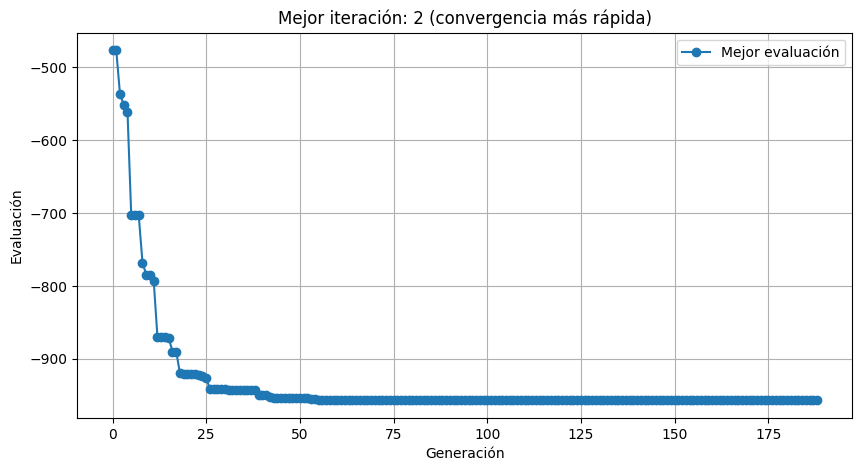

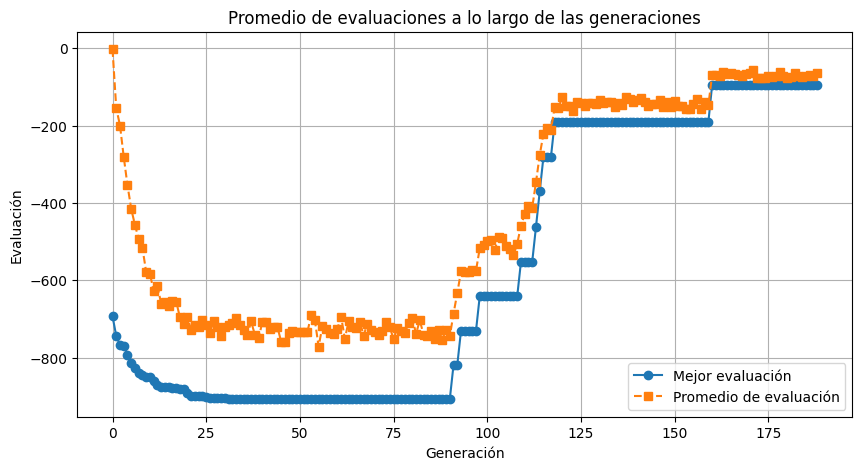

In [592]:
def iterar(n_veces=10):
    r = []
    gen_t = []
    eva_t = []  
    prom_t = []  

    for i in range(n_veces):
        print(f"\n🔁 Iteración {i+1} de {n_veces} 🔁")
        mejor_ind, mejor_apt, total_generacion, h, h_pp = AG(
        pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta,
        etapas, generaciones, umbral, max_sin_mejora)

        total_gen = len(h)
        gen_t.append(total_gen) 
        eva_t.append(h)  
        prom_t.append(h_pp)  

        print("\nTotal de generaciones:", total_gen)
        print("Mejor genotipo:", mejor_ind)
        print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
        print("Mejor evaluación f(x1,...,xn):", round(mejor_apt, decimales))

        r.append({
            "iteracion": i+1,
            "total_generaciones": total_gen,
            "mejor_fenotipo": mejor_ind,
            "mejor_evaluacion": round(mejor_apt, decimales),
            "historial": h,
            "historial_promedio": h_pp,
            "mejorfeno" : deco_ind(mejor_ind, m, a, b, decimales)
        })

    # convergenica
    convex = np.mean(gen_t)
    top = min(r, key=lambda x: x["mejor_evaluacion"])  # Iteración más rápida (top)

    #guardar_r(r, convex, top)


    print("\n === RESUMEN FINAL === ")
    for res in r:
        print(f"\n Iteración {res['iteracion']}:")
        print("   Total de generaciones:", res["total_generaciones"])
        print("   Mejor genotipo:", res["mejor_fenotipo"])
        print("   Mejor fenotipo:", res["mejorfeno"])
        print("   Mejor evaluación f(x1,...,xn):", res["mejor_evaluacion"])

    print("\n Promedio de convergencia:", round(convex, 2), "generaciones")
    print(" La iteración que tiene la mínima evaluación es:", top["iteracion"],
          "con", top["total_generaciones"], "generaciones.")

    # grafica de la mejor iteración
    plt.figure(figsize=(10, 5))
    plt.plot(top["historial"], label="Mejor evaluación", marker="o", linestyle="-")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title(f"Mejor iteración: {top['iteracion']} (convergencia más rápida)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # grafica del promedio de todas las evaluaciones
    max_gen = max(len(h) for h in eva_t)  
    eval_matriz = np.zeros((n_veces, max_gen))
    prom_matriz = np.zeros((n_veces, max_gen))

    for i in range(n_veces):
        eval_matriz[i, :len(eva_t[i])] = eva_t[i]
        prom_matriz[i, :len(prom_t[i])] = prom_t[i]

    #  promedio en cada generación
    prom_eva = np.mean(eval_matriz, axis=0)
    proms_t = np.mean(prom_matriz, axis=0)
    
    plt.figure(figsize=(10, 5))
    plt.plot(prom_eva, label="Mejor evaluación", linestyle="-", marker="o")
    plt.plot(proms_t, label="Promedio de evaluación", linestyle="--", marker="s")
    plt.xlabel("Generación")
    plt.ylabel("Evaluación")
    plt.title("Promedio de evaluaciones a lo largo de las generaciones")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    iterar(10)
